In [15]:
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import Adam
import time
from torchmetrics import Accuracy

In [ ]:
train_transforms = transforms.Compose([
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Grayscale(),
])

train_data = datasets.ImageFolder('train', transform=train_transforms, is_valid_file=lambda x: os.path.splitext(x)[1] in ['.jpg', '.jpeg', '.png'])
val_data = datasets.ImageFolder('test', transform=train_transforms, is_valid_file=lambda x: os.path.splitext(x)[1] in ['.jpg', '.jpeg', '.png'])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

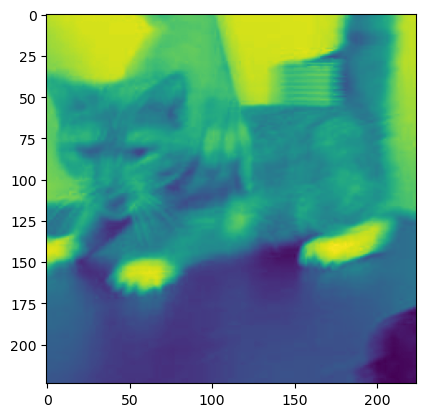

In [17]:
data, label = train_data[0]
plt.imshow(np.transpose(data, (1, 2, 0)))

In [18]:
class DeepCNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential( 
            nn.Conv2d(1, 16, kernel_size=5, padding='same'),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding='same'),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.LazyLinear(50),
            nn.ReLU(),
            nn.LazyLinear(2),
        )
        
    def forward(self, x):
        return self.model(x)

In [19]:
myModel = DeepCNNModel()

/home/maxwell/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [20]:
def train(model,train_dataset,epochs, max_batches):
    dataloader = DataLoader(train_dataset, batch_size=max_batches, shuffle=True)
    optimizer = torch.optim.Adam(model.parameters())
    loss = torch.nn.CrossEntropyLoss() 
    epoch = 0
    history = {
            'train_loss': [],
            'train_acc': [],
        }
    
    for epoch in range(epochs):
        l_list = []
        acc_list = []
        accuracy = Accuracy(task='multiclass', num_classes=2)
        epoch += 1
        
        for (xs, targets) in dataloader:
            optimizer.zero_grad()
            pred = model(xs)
            l = loss(pred, targets)
            l.backward()
            optimizer.step()
            l_list.append(l.item())
            acc_list.append(accuracy(pred, targets).item())
            
        train_loss, train_acc = np.mean(l_list), np.mean(acc_list)
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        print("epoch: %d train_loss=%.2f train_acc=%.2f" % (epoch, train_loss, train_acc))
        
    return pd.DataFrame(history)




In [21]:

hist = train(myModel, train_data, epochs=20, max_batches=128)

epoch: 1 train_loss=0.93 train_acc=0.49
epoch: 2 train_loss=0.69 train_acc=0.51
epoch: 3 train_loss=0.69 train_acc=0.54
epoch: 4 train_loss=0.68 train_acc=0.59
epoch: 5 train_loss=0.67 train_acc=0.61
epoch: 6 train_loss=0.63 train_acc=0.66
epoch: 7 train_loss=0.60 train_acc=0.67
epoch: 8 train_loss=0.56 train_acc=0.71
epoch: 9 train_loss=0.52 train_acc=0.75
epoch: 10 train_loss=0.48 train_acc=0.77
epoch: 11 train_loss=0.43 train_acc=0.80
epoch: 12 train_loss=0.38 train_acc=0.84
epoch: 13 train_loss=0.34 train_acc=0.86
epoch: 14 train_loss=0.29 train_acc=0.89
epoch: 15 train_loss=0.25 train_acc=0.91
epoch: 16 train_loss=0.22 train_acc=0.92
epoch: 17 train_loss=0.19 train_acc=0.93
epoch: 18 train_loss=0.15 train_acc=0.95
epoch: 19 train_loss=0.13 train_acc=0.96
epoch: 20 train_loss=0.10 train_acc=0.97


In [10]:
print(hist)

      train_loss  train_acc
0   4.270866e+08   0.516000
1   2.239345e+05   0.497178
2   9.670725e+02   0.502311
3   3.791931e+02   0.495719
4   1.033399e+02   0.502084
5   6.920053e+01   0.494277
6   3.068407e+01   0.499637
7   3.231860e+01   0.499381
8   1.778939e+01   0.500846
9   7.119982e+00   0.505984
10  1.388726e+01   0.484278
11  6.044183e+00   0.504474
12  6.107311e+00   0.492085
13  4.543809e+00   0.497928
14  1.153416e+01   0.505962
15  7.840219e+00   0.495725
16  5.249335e+00   0.505979
17  1.604221e+00   0.486220
18  7.776794e+00   0.493533
19  2.389926e+00   0.490172


## This model is overfitting